# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['AGE'] = np.floor(app_train['DAYS_BIRTH'] / 365)
app_train['AGE'].value_counts()

38.0    8873
37.0    8799
39.0    8770
40.0    8624
36.0    8614
27.0    8476
41.0    8449
31.0    8377
43.0    8308
42.0    8216
28.0    7975
32.0    7911
44.0    7819
30.0    7806
35.0    7804
33.0    7714
29.0    7670
34.0    7631
54.0    7551
53.0    7457
46.0    7293
45.0    7205
47.0    7018
48.0    6984
56.0    6828
57.0    6768
52.0    6763
51.0    6689
55.0    6637
59.0    6631
49.0    6627
50.0    6482
58.0    6268
60.0    6227
62.0    5514
61.0    5418
63.0    5197
64.0    5117
26.0    4561
25.0    4168
23.0    4057
24.0    3905
65.0    3113
22.0    2933
66.0    2085
67.0    2042
21.0    1254
68.0     866
69.0      16
20.0       1
Name: AGE, dtype: int64

In [6]:
app_train['AGE_CUT'] = pd.cut(app_train['AGE'],bins=[0, 30, 40, 50, 60, 100])
app_train['AGE_CUT'].value_counts()

(30, 40]     83117
(40, 50]     74401
(50, 60]     67819
(0, 30]      52806
(60, 100]    29368
Name: AGE_CUT, dtype: int64

In [7]:
age_groups = app_train.groupby('AGE_CUT').mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,AGE
AGE_CUT,,,,,,,,,,,,,,,,,,,,,
"(0, 30]",277717.389975,0.113983,0.140950,0.371624,0.610499,0.485532,161203.274934,492176.877116,25065.855548,443550.127124,...,0.000720,0.001704,0.007448,0.007542,0.033703,0.220466,0.258947,1.736556,0.003238,26.691266
"(30, 40]",278161.042831,0.092869,0.097128,0.406644,0.652502,0.829193,179710.659739,608956.451959,27989.015310,547464.836493,...,0.000626,0.000108,0.006193,0.007382,0.034340,0.283841,0.259781,1.814778,0.006774,35.610356
"(40, 50]",278300.194258,0.075510,0.091531,0.370049,0.720595,0.391715,180295.658368,659994.658701,28882.691137,591711.331307,...,0.000578,0.000040,0.006542,0.006129,0.033643,0.300093,0.257646,1.886768,0.029892,45.246233
"(50, 60]",278741.467111,0.059334,0.079786,0.271192,0.747151,0.061664,162606.352808,642846.275056,27295.890345,578075.915759,...,0.000324,0.000015,0.005949,0.007112,0.035359,0.278693,0.273536,2.008932,0.405919,55.402793
"(60, 100]",277469.805400,0.049203,0.052506,0.178425,0.768047,0.012360,136738.232086,507392.552268,23362.742151,456436.242881,...,0.000034,0.000000,0.005947,0.006972,0.035055,0.188271,0.294183,2.199653,0.847419,63.471329


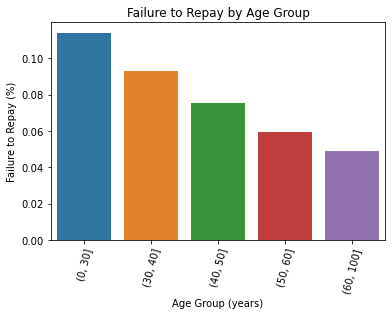

In [8]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

plt.xticks(rotation = 75); 
plt.xlabel('Age Group (years)'); 
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');